# Hyper Parameter

`-` 알고리즘을 사영해 모델링을 수행할 때 모델 성능을 최적화하기 위해 조절할 수 있는 매개변수

* KNN의 `n_neighbors`, tree의 `max_depth` 등

`-` 모델의 성능 향상을 위해선 최선의 하이퍼파라미터 값을 찾는 **다양한 시도**를 해야함

## Grid Search

`-` 모든 경우의 수를 고려

### KNN

`-` 1부터 $n$까지 주변 이웃수를 바꾸어구며 가장 최적의 모델을 찾음 $\to$ $n$이 커질수록 엄청난 시간이 소요됨

* KNN은 주변의 이웃수인 $k$값이 작을수록 복잡한 모델, 클수록 단순한 모델이된다.

* 보통 데이터 건수의 제곱근으로 결정하는 경우가 종종 있음

`-` 또한, 거리 계산법에 따라 성능이 달라질 수 있으나. 참고만 해두자

### tree

`-` max_depth : 트리의 최대 깊이로 **작을수록** 모형이 단순해짐

`-` min_samples_leaf 
* leaf가 되기 위한 최소한의 샘플 데이터 수
* 이 값이 클 수록 모델이 단순해 짐 

`-`  min_ samples_split : 분리하려면 최소 몇 명은 되어야한다.~~

* 노드를 분할하기 위한 최소한의 샘플 데이터 수

* 해당 값이 클 수록 모델이 단순해 짐 

`-` 위 값을을 적절히 조잘하여 과적합을 막을 수 있다.

## Random Search

`-` 1부터 n구간의 정수 중 무작위로 $m$개를 골라 최적의 모델을 선태그

* 임의의 $m$개만 골라 수행하니 시간 소모는 적을 것임

* 그러나 선택되지 못한 값중에서 **더 좋은 성능이 보이는 값이 있을까** 걱정됨.

`-` 근데 우리는 Random Search와 Grid Search를 함께 사용할 수 있음!

1. 일단 random search 수행

2. **그 다음 산출된 최적의 파라미터 주변 파라미터들에 대해서 grid search를 수행!**

## 실습

### 0. import

In [24]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.io as pio
pio.renderers.default = "plotly_mimetype+notebook_connected"

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format = 'retina'

### 1. 데이터 이해

In [4]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/jangrae/csv/master/boston.csv'
data = pd.read_csv(path)

**데이터 설명**

- crim: 자치시(Town)별 1인당 범죄율
- zn: 25,000 평방피트를 초과하는 거주지역 비율
- indus: 비소매상업지역이 점유하고 있는 토지 비율
- chas: 찰스강에 대한 더미 변수 (= 1 강 경계에 위치; 0 나머지)
- nox: 10ppm당 농축 일산화질소
- rm: 주택 1가구당 평균 방 개수
- age: 1940년 이전에 건축된 소유주택 비율
- dis: 5개 보스턴 직업센터까지 접근성 지수
- rad: 방사형 도로까지의 접근성 지수
- tax: 10,000달러 당 재산세율
- ptratio: 자치시(Town)별 학생/교사 비율
- black: 1000(Bk - 0.63)^2, 여기서 Bk는 자치시별 흑인의 비율을 의미
- lstat: 모집단 하위 계층의 비율(%)
- medv: 본인 소유 주택가격(중앙값) (단위:$1,000)

### 2. 데이터 준비

In [5]:
# target 확인
target = 'medv'

# 데이터 분리
x = data.drop(target, axis=1)
y = data[target]

In [7]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 데이터 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

### 3. 성능 예측

In [15]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, r2_score

tree = DecisionTreeRegressor(random_state =1)

cv_tree = cross_val_score(tree, x_train, y_train, cv = 5)

In [19]:
print(cv_tree)
print(cv_tree.mean())

[0.65873754 0.49225288 0.78163071 0.80327749 0.82834327]
0.7128483767547819


`-` 튜닝을 해보자. 먼가 튜닝을 하면 더 괜찮은 분석이 될 것 같다.

**1) 모델 튜닝**

- 성능을 확인할 파라미터를 딕셔너리 형태로 선언합니다.
- 기존 모델을 기본으로 RandomizedSearchCV 알고리즘을 사용하는 모델을 선언합니다.
- 다음 정보를 최종 모델에 파라미터로 전달합니다.
    - 기본 모델 이름
    - 파라미터 변수
    - cv: K-Fold 분할 개수(기본값=5)
    - n_iter: 시도 횟수(기본값=10)
    - scoring: 평가 방법

`-` step 1. 일단 Random Search를 수행

In [25]:
from sklearn.model_selection import RandomizedSearchCV

# 파라미터 선언
  # max_depth: 1~50
param = {"max_depth" : range(1, 51)}

tree =DecisionTreeRegressor(random_state=1)
# Random Search 선언
  # cv=5
  # n_iter=20
  # scoring='r2'
tree_model = RandomizedSearchCV(tree,       ## 기번 모델 이름을 전달
                                                                param,  ## 설정한 파라미터 범위를 전달
                                                                   cv = 5,  ## k-fold 개수  
                                                                     n_iter = 20, ## 전체 파라미터 범위 중에서 몇 개만 뽑을 것인지. 
                                                                           scoring = "r2")  
tree_model.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=1),
                   n_iter=20, param_distributions={'max_depth': range(1, 51)},
                   scoring='r2')

`-` 중요정보 확인

In [28]:
# 중요 정보 확인
print('=' * 80)
print(tree_model.cv_results_['mean_test_score'])
print('-' * 80)
print('최적파라미터:',tree_model.best_params_)
print('-' * 80)
print('최고성능:', tree_model.best_score_)
print('=' * 80)

[0.71284838 0.70905766 0.67646772 0.7383174  0.72240391 0.71284838
 0.71284838 0.71284838 0.71278394 0.71250015 0.71284838 0.37077174
 0.71284838 0.70928798 0.71284838 0.70526236 0.71284838 0.71284838
 0.71284838 0.71284838]
--------------------------------------------------------------------------------
최적파라미터: {'max_depth': 5}
--------------------------------------------------------------------------------
최고성능: 0.7383174002807829


`-` 변수 중요도 확인

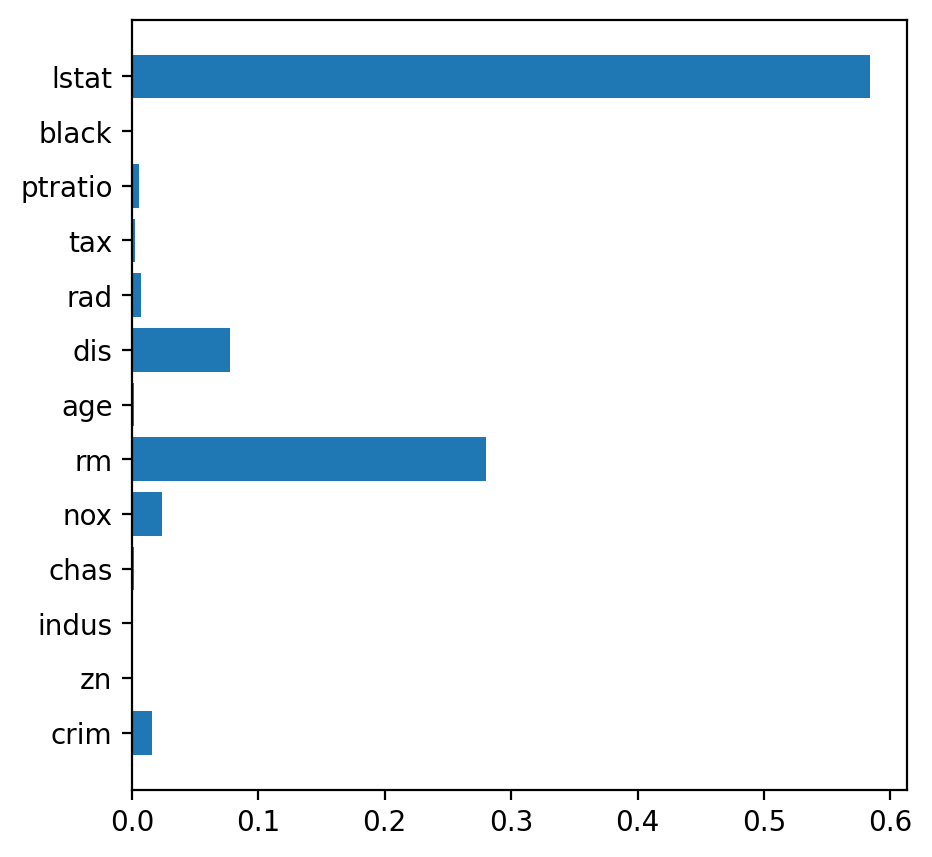

In [30]:
# 변수 중요도
plt.figure(figsize=(5, 5))
plt.barh(y=list(x), width=tree_model.best_estimator_.feature_importances_)
plt.show()

### 4. 성능 평가

In [32]:
y_pred = tree_model.predict(x_test)


print("MAE : ", mean_absolute_error(y_test, y_pred))
print("r2 : ", r2_score(y_test, y_pred))

MAE :  3.0965698865596964
r2 :  0.7389100169622292


***

## excercise. 1

### 0. import

In [95]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, r2_score, precision_score, recall_score

### 1. 데이터 이해

In [37]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/jangrae/csv/master/mobile.csv'
data = pd.read_csv(path)

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   id                           20000 non-null  int64 
 1   COLLEGE                      20000 non-null  int64 
 2   INCOME                       20000 non-null  int64 
 3   OVERAGE                      20000 non-null  int64 
 4   LEFTOVER                     20000 non-null  int64 
 5   HOUSE                        20000 non-null  int64 
 6   HANDSET_PRICE                20000 non-null  int64 
 7   OVER_15MINS_CALLS_PER_MONTH  20000 non-null  int64 
 8   AVERAGE_CALL_DURATION        20000 non-null  int64 
 9   REPORTED_SATISFACTION        20000 non-null  object
 10  REPORTED_USAGE_LEVEL         20000 non-null  object
 11  CONSIDERING_CHANGE_OF_PLAN   20000 non-null  object
 12  CHURN                        20000 non-null  int64 
dtypes: int64(10), object(3)
memory 

In [39]:
data.isna().sum()

id                             0
COLLEGE                        0
INCOME                         0
OVERAGE                        0
LEFTOVER                       0
HOUSE                          0
HANDSET_PRICE                  0
OVER_15MINS_CALLS_PER_MONTH    0
AVERAGE_CALL_DURATION          0
REPORTED_SATISFACTION          0
REPORTED_USAGE_LEVEL           0
CONSIDERING_CHANGE_OF_PLAN     0
CHURN                          0
dtype: int64

### 2. 데이터 준비

`-` 변수 제거

In [41]:
data.drop("id", axis = 1, inplace = True)
data.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,CHURN
0,0,31953,0,6,313378,161,0,4,unsat,little,no,0
1,1,36147,0,13,800586,244,0,6,unsat,little,considering,0
2,1,27273,230,0,305049,201,16,15,unsat,very_little,perhaps,0
3,0,120070,38,33,788235,780,3,2,unsat,very_high,considering,1
4,1,29215,208,85,224784,241,21,1,very_unsat,little,never_thought,0


`-` x, y 분리

In [42]:
target = "CHURN"
x = data.drop(target, axis = 1)
y = data[target]

`-` 가변수화

In [45]:
d_cols = ["REPORTED_SATISFACTION", "REPORTED_USAGE_LEVEL", "CONSIDERING_CHANGE_OF_PLAN"]

x = pd.get_dummies(x, columns = d_cols, dtype = float, drop_first = True)

In [46]:
x.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION_sat,REPORTED_SATISFACTION_unsat,REPORTED_SATISFACTION_very_sat,REPORTED_SATISFACTION_very_unsat,REPORTED_USAGE_LEVEL_high,REPORTED_USAGE_LEVEL_little,REPORTED_USAGE_LEVEL_very_high,REPORTED_USAGE_LEVEL_very_little,CONSIDERING_CHANGE_OF_PLAN_considering,CONSIDERING_CHANGE_OF_PLAN_never_thought,CONSIDERING_CHANGE_OF_PLAN_no,CONSIDERING_CHANGE_OF_PLAN_perhaps
0,0,31953,0,6,313378,161,0,4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,36147,0,13,800586,244,0,6,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1,27273,230,0,305049,201,16,15,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0,120070,38,33,788235,780,3,2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,1,29215,208,85,224784,241,21,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


`-` 학습용, 평가용 데이터 분리

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

### 3. 성능 예측

* 일단 k-fold로 예측

In [53]:
tree1 = DecisionTreeClassifier(max_depth = 5)

cv_tree = cross_val_score(tree1, x_train, y_train, cv = 10)
print(cv_tree)
print(cv_tree.mean())

[0.69928571 0.69214286 0.69857143 0.69285714 0.69428571 0.695
 0.70857143 0.69142857 0.70428571 0.70285714]
0.6979285714285715


### 4.  모델 튜닝

`-` 선언

In [65]:
params = {"max_depth" : range(3, 31)}

tree =DecisionTreeClassifier(random_state=1)
cv_tree2 = RandomizedSearchCV(tree,
                                                           params, cv = 5, n_iter = 20, scoring = "accuracy" )

`-` 모델 학습

In [66]:
cv_tree2.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1),
                   n_iter=20, param_distributions={'max_depth': range(3, 31)},
                   scoring='accuracy')

In [77]:
# 중요 정보 확인
print(cv_tree2.cv_results_["params"])
print('=' * 80)
print(cv_tree2.cv_results_['mean_test_score']) ## 각각의 랜덤서치요소 에서의 cv =5  결과
print('-' * 80)
print('최적파라미터:',cv_tree2.best_params_)
print('-' * 80)
print('최고성능:', cv_tree2.best_score_)
print('=' * 80)

[{'max_depth': 9}, {'max_depth': 8}, {'max_depth': 4}, {'max_depth': 5}, {'max_depth': 25}, {'max_depth': 21}, {'max_depth': 7}, {'max_depth': 24}, {'max_depth': 23}, {'max_depth': 30}, {'max_depth': 6}, {'max_depth': 11}, {'max_depth': 26}, {'max_depth': 29}, {'max_depth': 3}, {'max_depth': 13}, {'max_depth': 14}, {'max_depth': 28}, {'max_depth': 19}, {'max_depth': 27}]
[0.68792857 0.69428571 0.69964286 0.69621429 0.62078571 0.62321429
 0.69742857 0.61914286 0.61742857 0.61814286 0.69757143 0.67385714
 0.6205     0.61792857 0.68907143 0.65785714 0.65592857 0.61685714
 0.63342857 0.6165    ]
--------------------------------------------------------------------------------
최적파라미터: {'max_depth': 4}
--------------------------------------------------------------------------------
최고성능: 0.6996428571428571


`-` 변수 중요도 확인

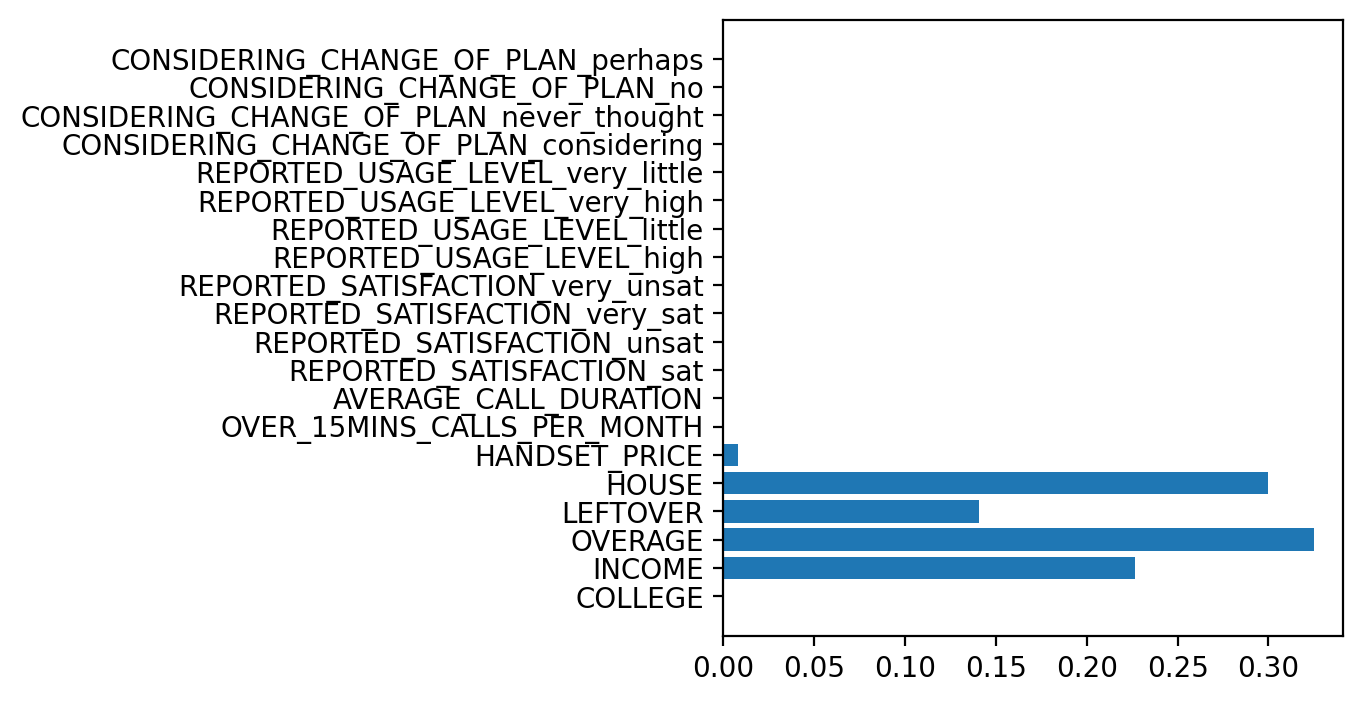

In [117]:
# 변수 중요도
plt.figure(figsize=(4, 4))
plt.barh(y=list(x), width=cv_tree2.best_estimator_.feature_importances_)
plt.show()

`-` 기존의 튜닝전과 비교

In [86]:
print("튜닝전 : ", cv_tree.mean(), ", 튜닝후 : ", cv_tree2.best_score_)

튜닝전 :  0.6979285714285715 , 튜닝후 :  0.6996428571428571


### 5. 성능평가

In [87]:
y_pred = cv_tree2.predict(x_test)

In [97]:
acc, pre, re, f1 = accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)

In [113]:
score = [acc, pre, re, f1]
measure = ["accuracy", "precision", "recall", "F1-score"]

fig = pd.DataFrame({"measure" : measure, "score" : score}).\
                                sort_values("score", ascending = False).\
                                    plot(y = "measure",  x= "score", color = "measure",
                                            backend = "plotly", kind = "barh", width = 600, height = 400)

fig.update_xaxes(range = (0.5, 0.8))

***

# Sampling

## 실습 : review

In [118]:
# 학습용 데이터 불러오기
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/insurance_train.csv'
data1 = pd.read_csv(path)

In [119]:
# 평가용 데이터 불러오기
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/insurance_test.csv'
data2 = pd.read_csv(path)

### 1. 데이터 이해

`-` 가변수화

In [120]:
# 가변수화
dumm_cols = ['sex', 'smoker', 'region']
data1 = pd.get_dummies(data1, columns=dumm_cols, drop_first=True)

# 확인
data1.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,41,31.600,0,6186.1270,False,False,False,False,True
1,30,25.460,0,3645.0894,True,False,False,False,False
2,18,30.115,0,21344.8467,False,False,False,False,False
3,61,29.920,3,30942.1918,False,True,False,True,False
4,34,27.500,1,5003.8530,False,False,False,False,True


`-` x, y 분리

In [121]:
# x, y 분리
target = 'charges'
x = data1.drop(target, axis=1)
y = data1.loc[:, target]

`-` 학습 및 평가 데이터 분리

In [122]:
# 학습용, 검증용 분리
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=1)

### 2. 모델링

In [123]:
# | code-fold : true
# 불러오기
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# 선언하기
model = DecisionTreeRegressor(max_depth=5, random_state=1)

# 학습하기
model.fit(x_train, y_train)

# 예측하기
y_val_pred = model.predict(x_val)

# 평가하기
print('MAE:', mean_absolute_error(y_val, y_val_pred))
print('R2:', r2_score(y_val, y_val_pred))

MAE: 2848.925847322852
R2: 0.8488510105762039


### 3. 일반화된 성능을 확인 (K-fold)

In [124]:
# 불러오기
from sklearn.model_selection import cross_val_score

# 성능예측
cv_score = cross_val_score(model, x_train, y_train, cv=5)

# 결과
print(cv_score)
print('평균:', cv_score.mean())

[0.80393852 0.87010485 0.80735679 0.84036835 0.81403185]
평균: 0.8271600698665711


### 4. 성능 튜닝

`-` Grid Search

In [125]:
# | code-fold : true
# 불러오기
from sklearn.model_selection import GridSearchCV

# 기본 모델 선언
model_dt = DecisionTreeRegressor(random_state=1)

# 파라미터 선언
params = {'max_depth': range(1, 51)}

# 모델 선언
model = GridSearchCV(model_dt,
                     params,
                     cv=5,
                     scoring='r2')

In [126]:
# 학습하기
model.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=1),
             param_grid={'max_depth': range(1, 51)}, scoring='r2')

In [127]:
# 예측 결과 확인
print(model.best_params_)
print(model.best_score_)

{'max_depth': 4}
0.83462894168412


In [128]:
# 성능 검증
y_val_pred = model.predict(x_val)
print(r2_score(y_val, y_val_pred))

0.8577535714634761


### 5. 최종 평가

In [129]:
# 평가 데이터 확인
data2.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [130]:
# 평가 데이터 가변수화
dumm_cols = ['sex', 'smoker', 'region']
data2 = pd.get_dummies(data2, columns=dumm_cols, drop_first=True)

# 확인
data2.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,False,True,False,False,True
1,18,33.770,1,True,False,False,True,False
2,28,33.000,3,True,False,False,True,False
3,33,22.705,0,True,False,True,False,False
4,32,28.880,0,True,False,True,False,False


In [133]:
# 예측하기
x_test = data2
y_pred = model.predict(x_test)

data2["charges"] = y_pred

`-` 파일 저장

In [136]:
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/insurance_test.csv'
data2 = pd.read_csv(path)
data2["charges"] = y_pred

In [141]:
data.to_csv?

In [142]:
data2.to_csv("insurance_test.csv", index= False)

`-` 다시 불러오기

In [144]:
pd.read_csv("insurance_test.csv").head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16167.418120
1,18,male,33.770,1,no,southeast,6117.634358
2,28,male,33.000,3,no,southeast,6117.634358
3,33,male,22.705,0,no,northwest,5235.846316
4,32,male,28.880,0,no,northwest,5235.846316


***

## 클래스 불균형

In [150]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/Attrition2.csv'
data = pd.read_csv(path)

### 1. 데이터 이해

In [151]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/Attrition2.csv'
data = pd.read_csv(path)

Attrition
0    1050
1     100
Name: count, dtype: int64


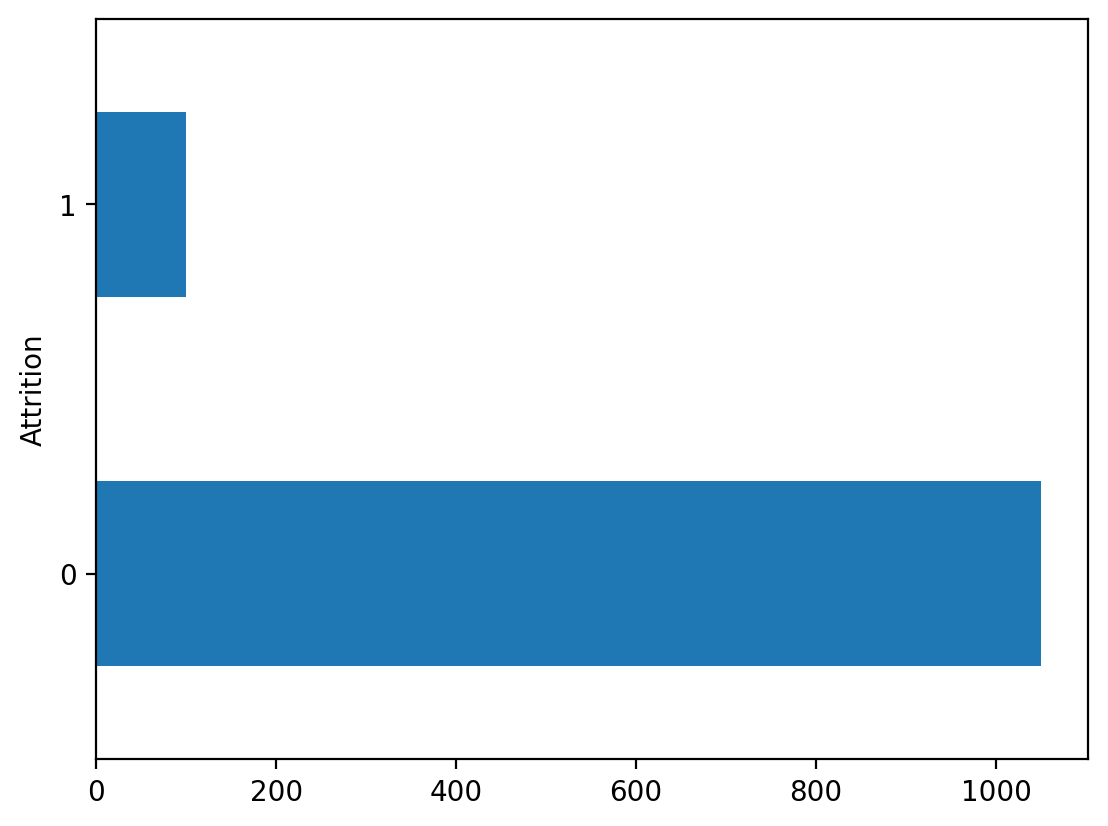

In [152]:
# Target 확인
print(data['Attrition'].value_counts())

# 시각화
data['Attrition'].value_counts().plot(kind='barh')
plt.show()

### 2. 데이터 준비

In [153]:
# 가변수화
dumm_cols = ['Education', 'Department', 'EducationField', 'Gender', 'JobRole', 'JobSatisfaction',
             'MaritalStatus', 'RelationshipSatisfaction', 'WorkLifeBalance']
data = pd.get_dummies(data, columns=dumm_cols, drop_first=True)

In [154]:
# target 확인
target = 'Attrition'

# 데이터 분리
x = data.drop(target, axis=1)
y = data.loc[:, target]

In [155]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

### 3. 모델링

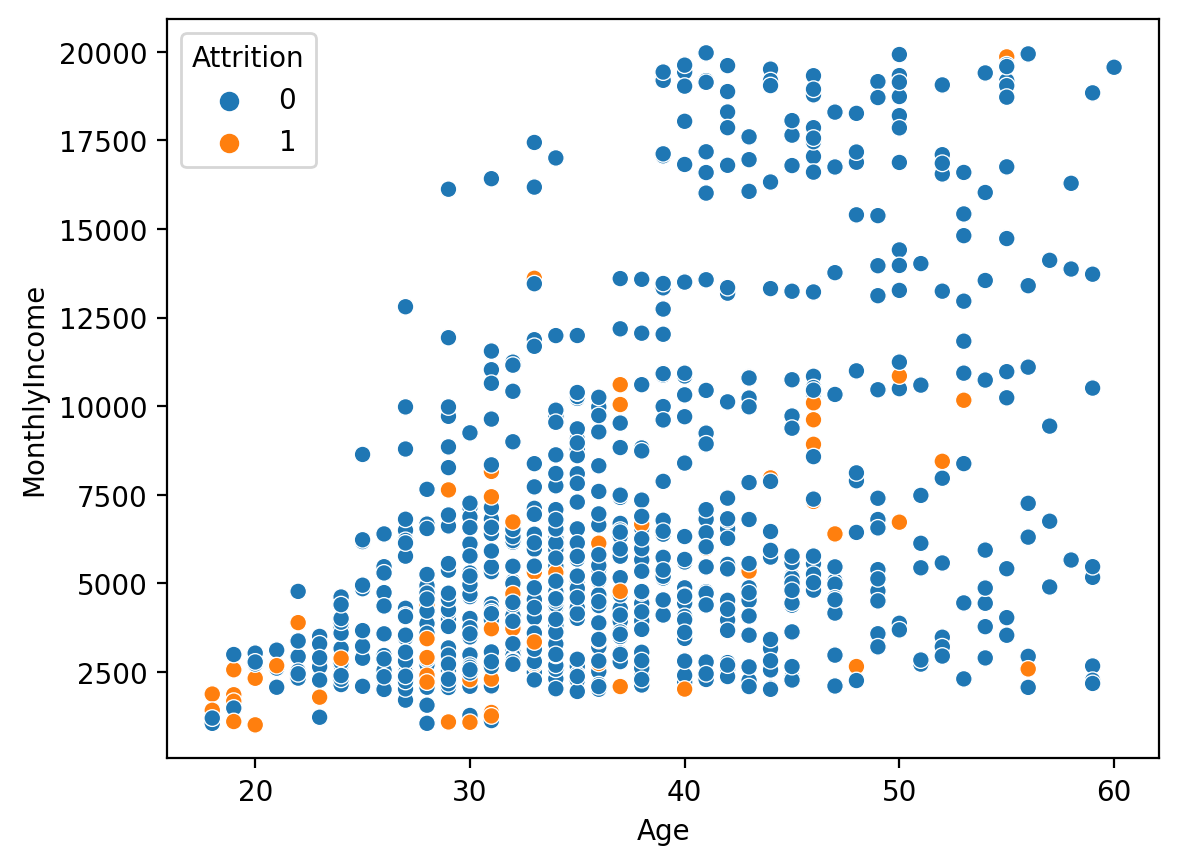

In [156]:
# 학습 데이터 분포 확인
sns.scatterplot(x='Age', y='MonthlyIncome', hue=y_train, data=x_train)
plt.show()

In [157]:
# | code-fold : true
# 불러오기
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

# 선언하기
model = RandomForestClassifier(max_depth=5, random_state=1)

# 학습하기
model.fit(x_train, y_train)

# 예측하기
y_pred = model.predict(x_test)

# 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[317   1]
 [ 26   1]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       318
           1       0.50      0.04      0.07        27

    accuracy                           0.92       345
   macro avg       0.71      0.52      0.51       345
weighted avg       0.89      0.92      0.89       345



- Accuracy(정확도)는 높지만 Target 값 1에 대한 **Recall(재현율, 민감도)**이 매우 낮다.

- 전체 데이터 중에서 Target 값이 1인 데이터가 매우 적기 때문!

- 이러한 현상을 **클래스 불균형** 이라고 한다.

- 이를 위해 **Under Sampling** 또는 **Over Sampling** 을 사용!

### 4. Under Sampling

* 클래스가 많은 비중의 데이터에서 표본을 적게 추출해 비율을 맞춤

In [160]:
# pip install imbalanced-learn

In [161]:
# 불러오기
from imblearn.under_sampling import RandomUnderSampler

# Under Sampling
under_sample = RandomUnderSampler()
u_x_train, u_y_train = under_sample.fit_resample(x_train, y_train)

# 확인
print('전:', np.bincount(y_train))
print('후:', np.bincount(u_y_train))

전: [732  73]
후: [73 73]


`-` 학습 데이터 분포확인

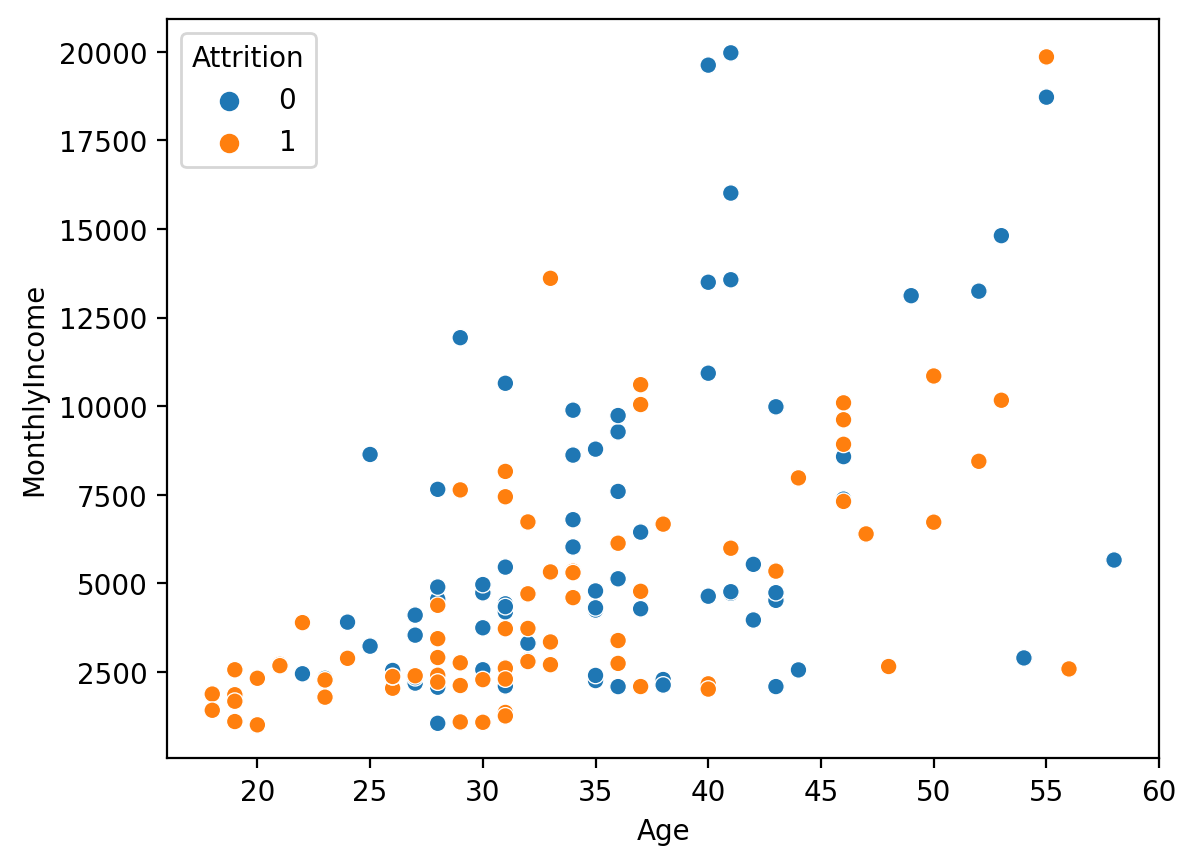

In [162]:
# 학습 데이터 분포 확인
sns.scatterplot(x='Age', y='MonthlyIncome', hue=u_y_train, data=u_x_train)
plt.show()

`-` 모델 성능 다시 확인

In [163]:
# 선언하기
model = RandomForestClassifier(max_depth=5, random_state=1)

# 학습하기
model.fit(u_x_train, u_y_train)

# 예측하기
y_pred = model.predict(x_test)

# 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[237  81]
 [ 13  14]]
              precision    recall  f1-score   support

           0       0.95      0.75      0.83       318
           1       0.15      0.52      0.23        27

    accuracy                           0.73       345
   macro avg       0.55      0.63      0.53       345
weighted avg       0.89      0.73      0.79       345



### 5. Over sampling

In [164]:
# 불러오기
from imblearn.over_sampling import RandomOverSampler

# Over Sampling
over_sample = RandomOverSampler()
o_x_train, o_y_train = over_sample.fit_resample(x_train, y_train)

# 확인
print('전:', np.bincount(y_train))
print('후:', np.bincount(o_y_train))

전: [732  73]
후: [732 732]


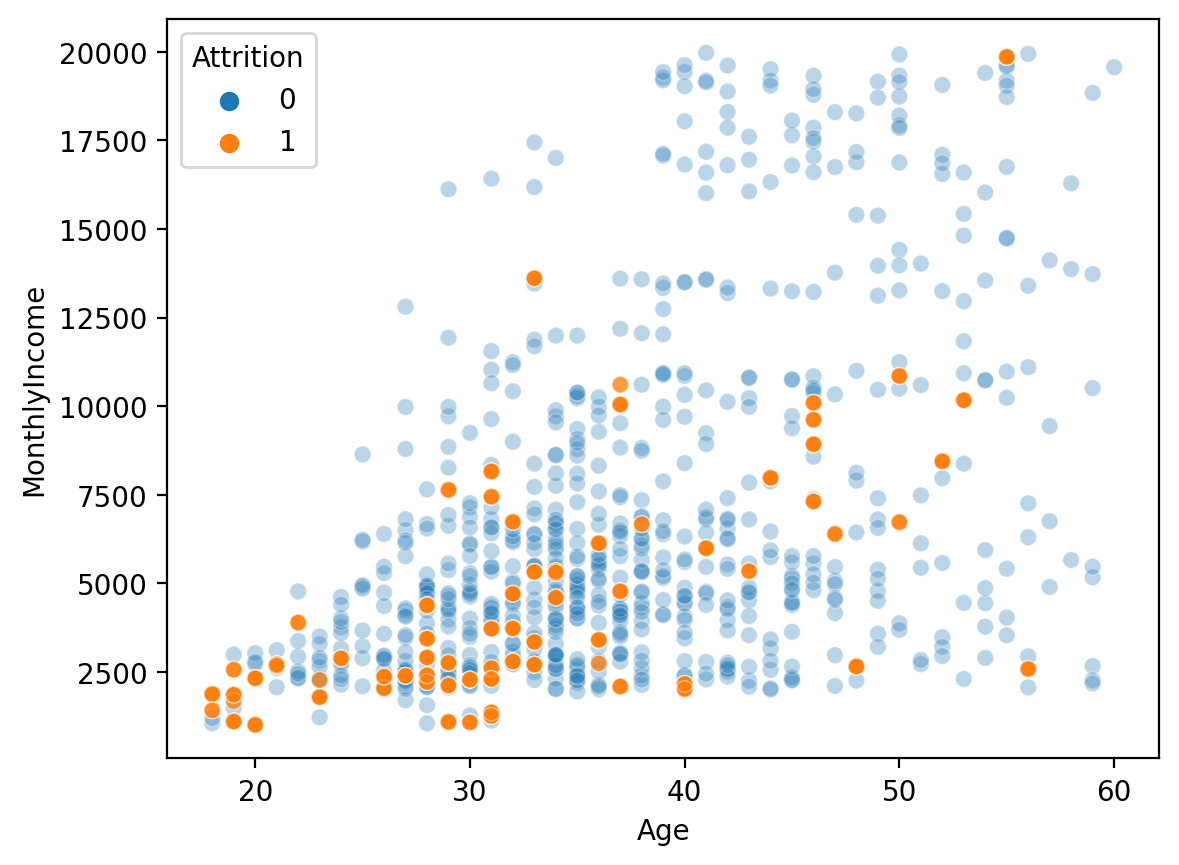

In [166]:
# 학습 데이터 분포 확인
sns.scatterplot(x='Age', y='MonthlyIncome', hue=o_y_train, data=o_x_train, alpha=0.3)
plt.show()

`-` 모델 성능 다시 확인

In [167]:
# 선언하기
model = RandomForestClassifier(max_depth=5, random_state=1)

# 학습하기
model.fit(o_x_train, o_y_train)

# 예측하기
y_pred = model.predict(x_test)

# 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[292  26]
 [ 16  11]]
              precision    recall  f1-score   support

           0       0.95      0.92      0.93       318
           1       0.30      0.41      0.34        27

    accuracy                           0.88       345
   macro avg       0.62      0.66      0.64       345
weighted avg       0.90      0.88      0.89       345



### 6. Over Sampling #2

`-` 클래스가 부족한 표본 사이에 해당 표본을 몇 개 더 추가

In [168]:
# 불러오기
from imblearn.over_sampling import SMOTE

# Over Sampling
smote = SMOTE()
s_x_train, s_y_train = smote.fit_resample(x_train, y_train)

# 확인
print('전:', np.bincount(y_train))
print('후:', np.bincount(s_y_train))

전: [732  73]
후: [732 732]


`-` 학습 데이터 분포 확인

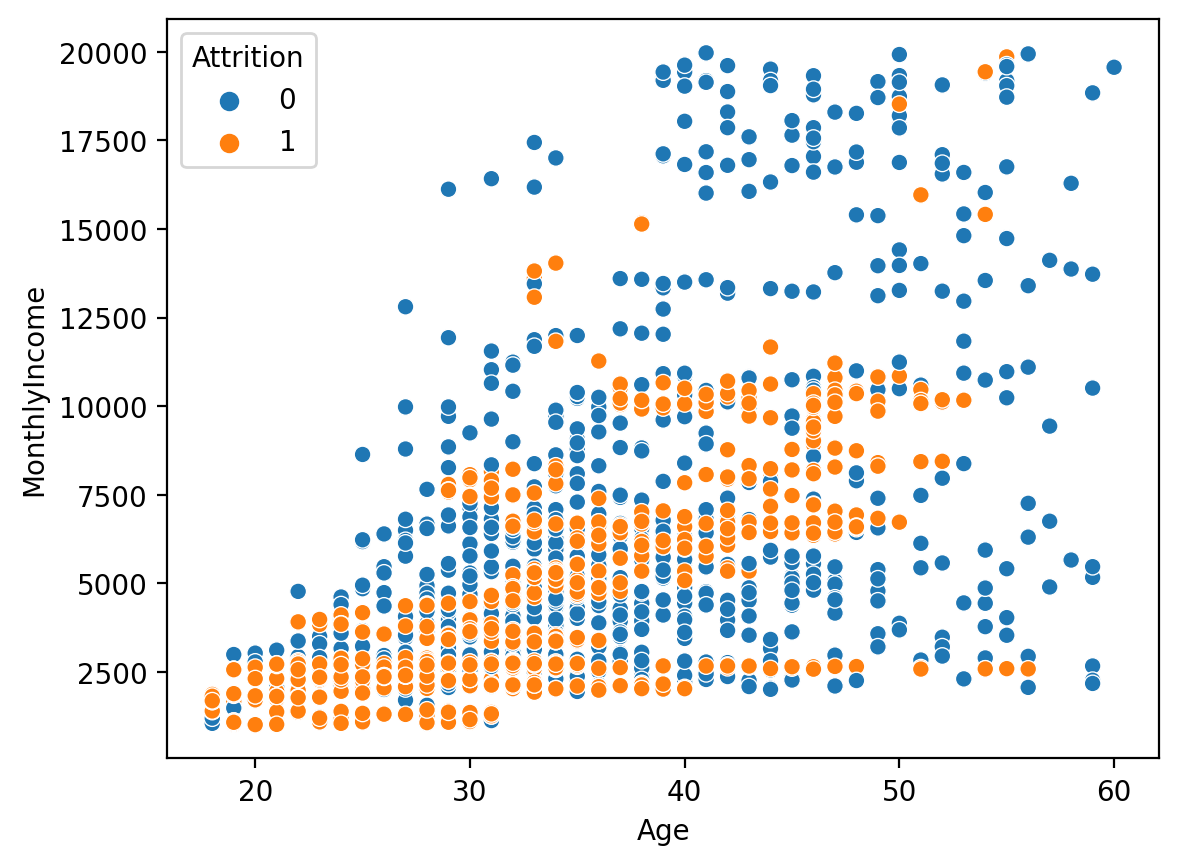

In [169]:
# 학습 데이터 분포 확인
sns.scatterplot(x='Age', y='MonthlyIncome', hue=s_y_train, data=s_x_train)
plt.show()

`-` 모델 성능 다시 확인

In [170]:
# 선언하기
model = RandomForestClassifier(max_depth=5, random_state=1)

# 학습하기
model.fit(s_x_train, s_y_train)

# 예측하기
y_pred = model.predict(x_test)

# 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[301  17]
 [ 20   7]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       318
           1       0.29      0.26      0.27        27

    accuracy                           0.89       345
   macro avg       0.61      0.60      0.61       345
weighted avg       0.89      0.89      0.89       345



### 7. Class weight

`-` class_weight 하이퍼파라미터를 설정해 모델링한 후 성능을 확인

* class_weight는 자체적으로 불균형 데이터에 대한 균형을 맞춰줌

In [171]:
# 선언하기
model = RandomForestClassifier(max_depth=5, random_state=1, class_weight='balanced')

# 학습하기
model.fit(x_train, y_train)

# 예측하기
y_pred = model.predict(x_test)

# 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[302  16]
 [ 17  10]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       318
           1       0.38      0.37      0.38        27

    accuracy                           0.90       345
   macro avg       0.67      0.66      0.66       345
weighted avg       0.90      0.90      0.90       345



***

# Ensemble

## 1. Voting

`-` 여러 모델들의 예측 결과를 투표를 통해 최종 예측 결과를 예측하는 방법 (서로 다른 알고리즘 사용가능)


* 하드 보팅 : 다수 모델이 예측한 값이 최종 결과값

* 소프트 보팅 : 각 모델에서 구한 클래스에 속할 확률의 평균을 구해서 예측 결과 산출

## 2. 배깅(Bootstrap Aggregation)

`-` 전체 데이터에서 각각 샘플링을 하여 개별 모델을 생성 (단, 샘플링 방식은 복원추출)

*  단, 모델은 같은 유형의 알고리즘 기반 모델들을 사용

* 범주형 데이터는 **Voting 방식**으로 결과를 집계

* 연속형 데이터는 **평균**으로 결과를 집계

* 대표적인 알고리즘 :  **Random Forest**

### (1) Random Forest

* 서로 다른 데이터로 만든 Decision Tree가 개별적으로 학습하여 모든 결과를 집계한 뒤 최종 결과를 결정하는 알고리즘

`-` Random 

1. Random하게 데이터를 샘플링 했다. **(일부는 중복이 되었지만... 그래도 뭐 인정!)**

2.  개별 모델이 트리를 구성할 때 분할 기준이 되는 변수를 랜덤하게 선정 $\to$ 무작위로 뽑은 $n$개의 변수 중에서 가장 **Gain**이 큰 변수를 기준으로 트리를 분할

3. `2`번의 이유로 개별 모델마다 다른 구조의 트리를 형성할 것임

***

`-`  파라미터

*  n_estimatorsr : 트리의 개수

* max_depth : 트리의 촤대 깊이

* min_samples_split : 트리와 동일

* min_samples_leaf : 트리와 동일

* max_feature : 최선의 분할을 위해 고려할 Feature 수(기본값: auto)
    * 기본값으로 설정하면 모든 Feature를 사용해서 분할 수행
    * 정수형으로 선언하면 Feature 수, 실수형으로 선언하면 Feature 비율
    * 'sqrt'로 선언하면 전체 Feature 수의 루트 값
    * 'auto'로 설정하면 'sqrt'와 같은 의미
    * 'log'로 선언하면 log2(전체 Feature 수)

### (2) 부스팅(Boosting)

* 같은 유형의 알고리즘 기반 모델 **여러 개에 대해 순차적으로 학습**을 수행

* 이전 모델이 **제대로 예측하지 못한 데이터에 대해서 가중치를 부여**하여 **다음 모델이 학습과 예측을 진행**하는 방법

* 계속하여 모델에게 가**중치를 부스팅하며 학습을 진행해 부스팅 방식**이라 함

* 예측 성능이 뛰어나 **앙상블 학습**을 주도함

* 배깅에 비해 성능이 좋지만, **속도가 느리고 과적합 발생 가능성이** 있음 → 상황에 맞게 적절히 사용해야 함

* 대표적인 부스팅 알고리즘: XGBoost, LightGBM`

`-` 배깅은 투표 or 평균, 부스팅은 잔차와 가중치를 이용하여 순차적 학습을 진행!!

* 부스팅은 잔차를 추정한다.

#### Gradient Boost (이 부분 다시정리)

`-` $f_i(x)$ : $i$ 번째 예측 모델이라고하자

`-` $e_i$ : $i$ 번째 예측 모델의 오차

#### XGBoost extreme Gradient Boosting

`-` 부스팅을 구현한 대표적인 알고리즘 중 하나가 GBM(Gradient Boost Machine)

*  GBM 알고리즘을 병렬 학습이 가능하도록 구현한 것이 XGBoost

*  회귀, 분류 문제를 모두 지원하며, 성능과 자원 효율이 좋아 많이 사용됨

`-` 장점

* 높은 예측 성능

* GBM 대비 빠른 수행 시간 : 병렬 수행 및 다양한 기능으로 GBM에 비해 빠르게 수행됨

* 규제 (Regularzaiton) : GBM에 없었던 과적합 규제 기능을 가지고 있

* 가지치기(Tree Pruning) : max_depth 등의 하이퍼파라미터로 가지치기를 할 수 있음
     * Tree Pruning 기능으로 성능에 이점이 없는 분할은 가지치기 할 수 있음

* 내장된 교차 검증 : 반복 수행시마다 내부적으로 학습 데이터와 검증 데이터에 대한 교차 검증을 수행
    * 지정된 반복 횟수가 아닌 교차 검증을 통해 성능을 확인하여 필요시 **조기 중단** 가능 (검증 데이터에 대한 성능이 떨어질 경우!)

* 결측치 자체 처리 : 알아서 결측치를 고려해서 학습함(결측치 여부를 노드 분시를 위한 질문에 포함시킴)
    * 하지만 명시적으로 결측치에 대한 처리를 진행하기를 권고한다.....

### (3) stacking

`-` 여러 모델의 예측 값을 최종 모델의 학습 데이터로 사용하여 예측하는 방법
* KNN, Logistic Regression, XGBoost 모델을 사용해 4종류 예측값을 구한 후, 이 예측 값을 최종 모델인 Randomforest 학습 데이터로 사용
* 현실 모델에서 많이 사용되지 않으며, 캐글(Kaggle) 같은 미세한 성능 차이로 승부를 결정하는 대회에서 사용됨
* 기본 모델로 4개 이상 선택해야 좋은 결과를 기대할 수 있음

## 실습

### (1) 데이터 이해

In [172]:
# 데이터 불러오기
path = 'https://raw.githubusercontent.com/jangrae/csv/master/admission_simple.csv'
data = pd.read_csv(path)

In [173]:
# 데이터 살펴보기
data.head()

,GRE,TOEFL,RANK,SOP,LOR,GPA,RESEARCH,ADMIT
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,0


In [174]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   GRE       500 non-null    int64  
 1   TOEFL     500 non-null    int64  
 2   RANK      500 non-null    int64  
 3   SOP       500 non-null    float64
 4   LOR       500 non-null    float64
 5   GPA       500 non-null    float64
 6   RESEARCH  500 non-null    int64  
 7   ADMIT     500 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 31.4 KB


In [175]:
data.isna().sum()

GRE         0
TOEFL       0
RANK        0
SOP         0
LOR         0
GPA         0
RESEARCH    0
ADMIT       0
dtype: int64

### (2) 데이터 준비

In [176]:
# target 확인
target = 'ADMIT'

# 데이터 분리
x = data.drop(target, axis=1)
y = data[target]

In [177]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [178]:
# 모듈 불러오기
from sklearn.preprocessing import MinMaxScaler

# 정규화
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_s = scaler.transform(x_train)
x_test_s = scaler.transform(x_test)

### (3) 모델링

In [185]:
# 라이브러리 불러오기
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import *

In [182]:
# xgboost 설치
#!pip install xgboost

In [184]:
# lightgbm 설치
#!pip install lightgbm

`1` Knn

In [187]:
# 선언하기
model = KNeighborsClassifier(n_neighbors=5)

# 학습하기
model.fit(x_train_s, y_train)

# 예측하기
y_pred = model.predict(x_test_s)

# 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[79  5]
 [15 51]]
              precision    recall  f1-score   support

           0       0.84      0.94      0.89        84
           1       0.91      0.77      0.84        66

    accuracy                           0.87       150
   macro avg       0.88      0.86      0.86       150
weighted avg       0.87      0.87      0.86       150



`2` tree

In [188]:
# 선언하기
model = DecisionTreeClassifier(max_depth=5, random_state=1)

# 학습하기
model.fit(x_train, y_train)

# 예측하기
y_pred = model.predict(x_test)

# 5단계: 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[77  7]
 [13 53]]
              precision    recall  f1-score   support

           0       0.86      0.92      0.89        84
           1       0.88      0.80      0.84        66

    accuracy                           0.87       150
   macro avg       0.87      0.86      0.86       150
weighted avg       0.87      0.87      0.87       150



`3` logistic

In [190]:
# 선언하기
model = LogisticRegression()

# 학습하기
model.fit(x_train, y_train)

# 예측하기
y_pred = model.predict(x_test)

# 5단계: 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[75  9]
 [14 52]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.87        84
           1       0.85      0.79      0.82        66

    accuracy                           0.85       150
   macro avg       0.85      0.84      0.84       150
weighted avg       0.85      0.85      0.85       150



`4` Random Forest

In [196]:
model = RandomForestClassifier(max_depth = 5, random_state = 1) ## default tree = 100

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[78  6]
 [13 53]]
              precision    recall  f1-score   support

           0       0.86      0.93      0.89        84
           1       0.90      0.80      0.85        66

    accuracy                           0.87       150
   macro avg       0.88      0.87      0.87       150
weighted avg       0.88      0.87      0.87       150



In [198]:
print(list(x))
print(model.feature_importances_)

['GRE', 'TOEFL', 'RANK', 'SOP', 'LOR', 'GPA', 'RESEARCH']
[0.22081595 0.20240024 0.09976925 0.08278875 0.04189168 0.32011405
 0.0322201 ]


`5` XGBoost

In [202]:
model = XGBClassifier(max_depth = 5, random_state = 1)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[77  7]
 [15 51]]
              precision    recall  f1-score   support

           0       0.84      0.92      0.88        84
           1       0.88      0.77      0.82        66

    accuracy                           0.85       150
   macro avg       0.86      0.84      0.85       150
weighted avg       0.86      0.85      0.85       150



In [203]:
print(list(x))
print(model.feature_importances_)

['GRE', 'TOEFL', 'RANK', 'SOP', 'LOR', 'GPA', 'RESEARCH']
[0.10025358 0.10419714 0.07541527 0.09831444 0.07010549 0.43016294
 0.1215511 ]


`6` LightGBM

In [235]:
#model = LGBMClassifier(max_depth = 5, random_state = 1) ## 이렇게 하면 먼가 주르륵, 주르륵 뜬다. 그래서  verbose 인자를 넣어줌

model = LGBMClassifier(max_depth = 5, random_state = 1,verbose = -100) 
model.fit(x_train, y_train) 

y_pred = model.predict(x_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print(list(x))
print(model.feature_importances_)

[[77  7]
 [14 52]]
              precision    recall  f1-score   support

           0       0.85      0.92      0.88        84
           1       0.88      0.79      0.83        66

    accuracy                           0.86       150
   macro avg       0.86      0.85      0.86       150
weighted avg       0.86      0.86      0.86       150

['GRE', 'TOEFL', 'RANK', 'SOP', 'LOR', 'GPA', 'RESEARCH']
[221 190  50 115  63 383  34]


`-` 음 변수 중요도가 뭔가 다른 모델들과 비교해 굉장히 크게 나온다. 척도가 다르구나 하고 넘어가자.

### (4) 참고 : Early Stopping

In [209]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state=1)


model = XGBClassifier(max_depth= 5, random_state = 1)

model.fit(x_train, y_train,
                eval_set=[(x_train, y_train), (x_val, y_val)],
                early_stopping_rounds=10) 

[0]	validation_0-logloss:0.50189	validation_1-logloss:0.50718
[1]	validation_0-logloss:0.39727	validation_1-logloss:0.41745
[2]	validation_0-logloss:0.32813	validation_1-logloss:0.35767
[3]	validation_0-logloss:0.28005	validation_1-logloss:0.32211
[4]	validation_0-logloss:0.24248	validation_1-logloss:0.30427
[5]	validation_0-logloss:0.21255	validation_1-logloss:0.29216
[6]	validation_0-logloss:0.19052	validation_1-logloss:0.28142
[7]	validation_0-logloss:0.17478	validation_1-logloss:0.26955
[8]	validation_0-logloss:0.16192	validation_1-logloss:0.26525
[9]	validation_0-logloss:0.15309	validation_1-logloss:0.25668
[10]	validation_0-logloss:0.14571	validation_1-logloss:0.25679
[11]	validation_0-logloss:0.14029	validation_1-logloss:0.25512
[12]	validation_0-logloss:0.13597	validation_1-logloss:0.25464
[13]	validation_0-logloss:0.12819	validation_1-logloss:0.25188
[14]	validation_0-logloss:0.12105	validation_1-logloss:0.25316
[15]	validation_0-logloss:0.11541	validation_1-logloss:0.25592
[1

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

`-` 그 후에 내용은 나중에 코드 참고...

In [237]:
results = model.evals_result()
#results

AttributeError: 'LGBMClassifier' object has no attribute 'evals_result'

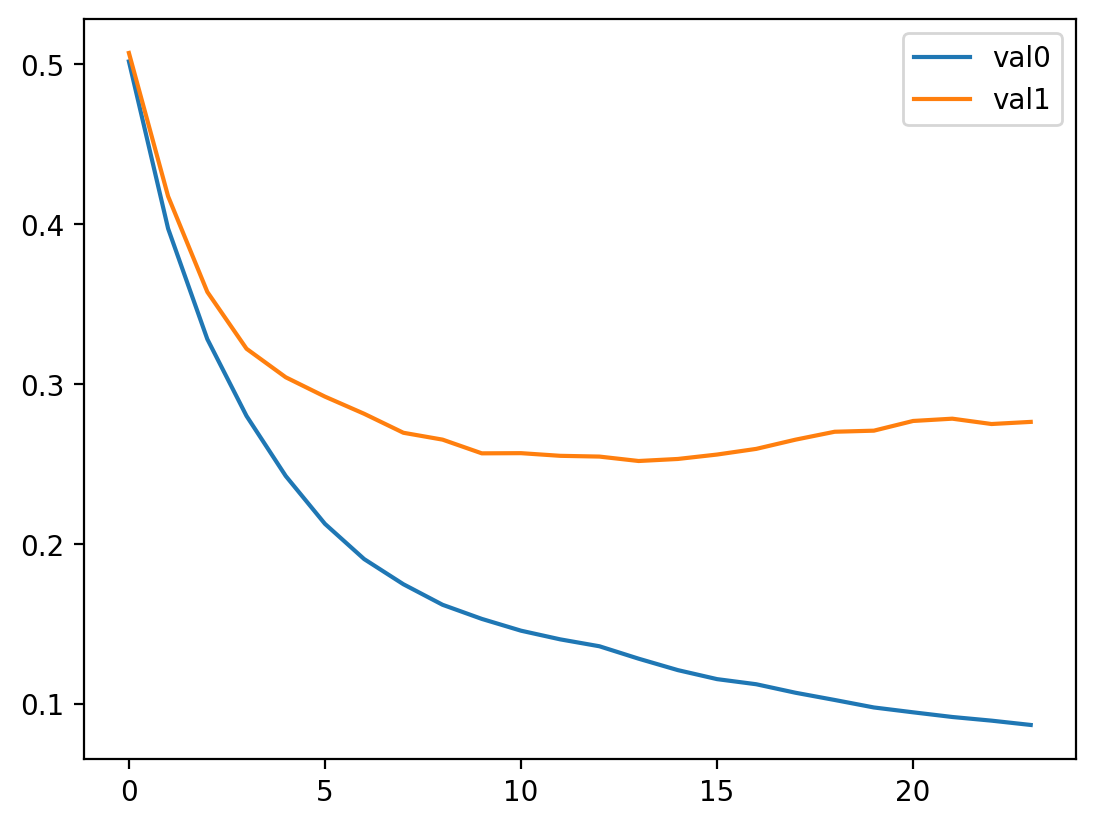

In [227]:
plt.plot(results['validation_0']["logloss"],label= "val0")
plt.plot(results['validation_1']["logloss"],label= "val1")
plt.legend()